In [5]:
image_path = '../dataset/xray_panoramic_mandible/masks/0022.png'
mask_path = '../dataset/xray_panoramic_mandible/txt/0022.txt'

In [6]:
import cv2
import numpy as np

image = cv2.imread(image_path)

with open(mask_path, 'r') as file:
    coordinates = file.readline().strip().split()[1:] 

coordinates = np.array(coordinates, dtype=np.float32).reshape(-1, 2) * np.array(image.shape[:2][::-1])

mask = np.zeros_like(image)

cv2.fillPoly(mask, [coordinates.astype(int)], color=(255, 255, 255)) 

masked_image = cv2.bitwise_and(image, mask)
resize_factor = 0.2
masked_image = cv2.resize(masked_image, None, fx=resize_factor, fy=resize_factor)

cv2.imshow('Segmentation', masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## BINARY MASK (MANUAL THRESHOLD)

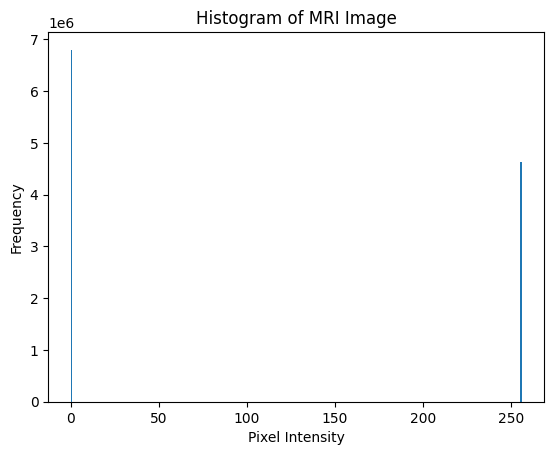

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if image is None:
    print("Error: Unable to load the image.")
else:
    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.title('Histogram of MRI Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

    threshold_value = 100

    _, binary_mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    kernel = np.ones((5, 5), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

    resize_factor = 0.2
    binary_mask = cv2.resize(binary_mask, None, fx=resize_factor, fy=resize_factor)

    cv2.imshow('Binary Mask', binary_mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [33]:
import cv2
import numpy as np

kernel = np.ones((5, 5), np.uint8)
binary_mask_opened = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

binary_mask_inverted = cv2.bitwise_not(binary_mask_opened)

result_image = cv2.bitwise_and(image, image, mask=binary_mask_inverted)

cv2.imshow('Jawbone Mask', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


## OTSU BINARY MASK

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

_, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

resize_factor = 0.2
otsu = cv2.resize(otsu, None, fx=resize_factor, fy=resize_factor)


cv2.imshow('Binary Mask (Otsu)', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

## ADAPTIVE BINARY MASK

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

binary_mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

resize_factor = 0.2
binary_mask = cv2.resize(binary_mask, None, fx=resize_factor, fy=resize_factor)


cv2.imshow('Binary Mask (Adaptive)', binary_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()